##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

## <br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 2 DO LABORATORIUM 4</h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</h1>
    <h1 style = "font-size:24px">Metoda gradientu prostego, perceptron</h1>
    <h1 style = "font-size:24px">Tomasz Neumann</h1>
    <h3 style = "font-size:21px">Perceptron, SGDClassifier</h3>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 1. Przykład 2

Perceptron stanowi jedną z najprostszych architektur SSN, zaproponowaną w 1957 roku przez Franka
Rosenblatta. Jego podstawą jest nieco zmodyfikowany sztuczny neuron, zwany progową jednostką logiczną (ang. Threshold Logic Unit — TLU) lub liniową jednostką progową (ang. Linear Threshold Unit — LTU). Wartościami wejść/wyjść są liczby (a nie stany binarne), a każde połączenie ma przyporządkowaną wagę. Jednostka TLU wylicza ważoną sumę sygnałów
wejściowych, a następnie zostaje użyta funkcja skokowa (najczęściej można spotkać rozwiązanie z funkcją skokową Heaviside'a lub funkcję signum) wobec tej sumy, dająca ostateczny wynik.

Pojedyncza jednostka TLU może być używana w prostych zadaniach klasyfikacji. Oblicza liniową
kombinację danych wejściowych i jeżeli wynik przekracza określony próg, to klasyfikuje przykład
do klasy pozytywnej, jeśli zaś rezultat nie przekroczy progu — do klasy negatywnej.
Przykładową implementację pojedynczej sieci TLU zawiera moduł Scikit-Learn w klasie Perceptron, co pokazuje poniższy fragment kodu.

In [2]:
#import zbioru danych oraz klasy Perceptron 
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
X, y = load_digits(return_X_y=True)
clf = Perceptron()
clf.fit(X, y)
print(clf.score(X, y))
#ma być to samo
clf_sgd2 = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
clf_sgd2.fit(X, y)
print(clf_sgd2.score(X, y))


0.9393433500278241
0.9666110183639399


Okazuje się, że klasa Perceptron jest równoważna stosowaniu klasy SGDClassifier z następującymi parametrami: loss="perceptron", learning_rate="constant", eta0=1 (współczynnik uczenia) oraz penalty=None (brak regularyzacji).
Na tym etapie należy zwrócić uwagę, że w przeciwieństwie do klasyfikatorów regresji logistycznej, perceptrony nie wyliczają prawdopodobieństwa przynależności do klasy: określają one prognozy na podstawie wyznaczonego
progu. Jest to jeden z powodów, dla których warto wybierać klasyfikatory regresji logistycznej przed
perceptronami. Marvin Minsky i Seymour Papert w swojej monografii (1969) wykazali wiele poważnych wad modelu  perceptronu, zwłaszcza związanych z niemożnością rozwiązywania pewnych trywialnych problemów, stąd wielu badaczy porzuciło badania nad sieciami neuronowymi na rzecz bardziej ogólnych zagadnień. 

W tej części będziemy kontynuować wytrenowanie klasyfikatora stochastycznego spadku wzdłuż gradientu (Stochastic Gradient Descent — SGD z klasy SGDClassifier). Algorytm ten cechuje się możliwością wydajnego przetwarzania bardzo dużych zestawów danych. Wynika to częściowo z faktu, że klasyfikator SGD przetwarza poszczególne przykłady
uczące niezależnie od siebie, po jednym naraz (z tego powodu nadaje się on również do uczenia przyrostowego).
W przykładzie 1 tego notatnika zostania pokazana klasyfikacja dwóch zbiorów rozdzielonych liniowo wraz z podanym marginesem błędu dla tej linii. 

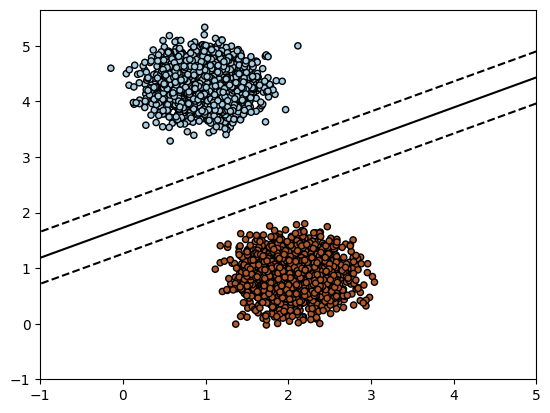

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# stworzenie danych wejściowych za pomocą klasy make_blobs
X, Y = make_blobs(n_samples=5000, centers=2, random_state=0, cluster_std=0.30)

# wybranie modelu i wytrenowanie klasyfikatora
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
clf = SGDClassifier(loss="perceptron", alpha=0.01, max_iter=200)
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
clf = SGDClassifier(loss="log_loss", alpha=0.01, max_iter=200)
clf.fit(X, Y)

# wykreślenie zbiorów punktów, lini rozdzielającej oraz jej odchyleń
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()

W przykładzie 2 dane wejściowe będzie stanowił zbiór MNIST, który był już używany na poprzednich zajęciach. Jak pamiętamy, w tym zbiorze danych występuje 70 000 obrazów, a każdy z nich jest opisany 784 cechami. Wynika to
z faktu, że obraz ma rozmiar $28\times28$ pikseli i każda cecha opisuje natężenie szarości danego piksela
i przyjmuje wartości od 0 (kolor biały) do 255 (kolor czarny). Jak poprzednio użyjemy możliwości biblioteki tensorflow, która pobierze zbiór danych i podzieli go na część treningową i testową. Na tym etapie etykieta jest łańcuchem znaków, stąd też następuje przekształcenie etykiet na wartość całkowitoliczbową, gdyż większość algorytmów uczenia maszynowego spodziewa się wartości numerycznych.

In [4]:
import keras
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)
print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training set size:  (60000, 28, 28)
Test set size:  (10000, 28, 28)


Następnie wyświetlony zostanie przykładowy obrazek z tego zbioru oraz jego etykieta (jak widzimy jest typu liczbowego).

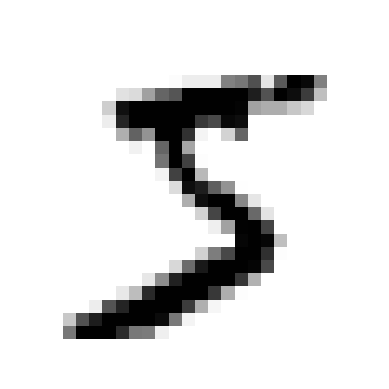

Prawdziwa etykieta:  5


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit_image = X_train[0]
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()
print('Prawdziwa etykieta: ', y_train[0])

Rozważony zostanie przykład klasyfikatora binarnego, który będzie rozpoznawał jedynie dwie klasy: piątki i pozostałe cyfry. Odpowiednie przekształcenie tego problemu zostało przedstawione w poniższym fragmencie kodu, który tworzy wartości True dla 5 i False dla pozostałych cyfr.

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(y_train_5[0], y_train_5[1])

True False


Następnie wybrany zostaje klasyfikator SGD z klasy SGDClassifier i trenujemy go na zestawie danych wejściowych przeznaczonych do uczenia. Należy zwrócić uwagę na przygotowanie odpowiedniego kształtu danych do wybranego algorytmu. Skuteczność klasyfikatora SGDClassifier zależy od losowości na etapie uczenia, a jeżeli chcemy mieć powtarzalne wyniki należy wyznaczyć wartość parametru random_state.

In [7]:
from sklearn.linear_model import SGDClassifier
print(X_train.shape[0], X_train.shape[1],X_train.shape[2] )
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_train.shape)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

60000 28 28
(60000, 784)


SGDClassifier(random_state=42)

Na tym etapie możemy sprawdzić , jak klasyfikator zgaduje, że na obrazie jest cyfra 5. W przypadku pierwszego obrazu nie pomylił się (wyświetliliśmy powyżej piątkę), jak i wartość dokładności klasyfikatora na poziomie 95% wygląda bardzo dobrze.

In [8]:
print(sgd_clf.predict(X_train))
print(sgd_clf.predict(X_test))

print(sgd_clf.score(X_train, y_train_5))
print(sgd_clf.score(X_test, y_test_5))

[ True False False ...  True False False]
[False False False ... False  True False]
0.9522666666666667
0.9492


Jednak dobrym sposobem oceny modelu jest użycie sprawdzianu krzyżowego. Wykonamy w tym celu kroswalidację 5-krotną (parametr cv=5) za pomocą funkcji <i>cross_val_score()</i>.

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

Tutaj także uzyskuje się wynik prawidłowych prognoz w okolicach 95%.

Prześledźmy więc działanie prostego klasyfikatora, który kalsyfikuje jedynie obrazy nie będące piątkami

In [10]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

oraz wyznaczmy jego dokładność.

In [11]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

Tu uzyskujemy dokładność w okolicach 90%. Jak widać nierówne zbiory danych dla poszczególnych etykiet mogą mieć ogromne znaczenie. Z powyższego eksperymentu wynika, że gdybyśmy zgadywali, ze dany obraz nie jest piątką mielibyśmy rację  w 90% przypadkach - około 10% stanowią tylko piątki, stąd dokładność nie stanowi dobrej miary wydajności klasyfikatorów w takiego typu zbiorach danych.

Lepszym sposobem oceny wydajności klasyfikatora jest analiza macierzy pomyłek. W celu obliczenia macierzy pomyłek musimy najpierw uzyskać zbiór prognoz, które porównamy z rzeczywistymi wartościami docelowymi. W tym celu posłużymy się funkcją <i>cross_val_predict()</i>, która przeprowadzi <i>k</i>-krotny test krzyżowy zwracając prognozy dla każdego podzbioru. 

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

Następnie można uzyskać macierz pomyłek podając etykiety wejściowe oraz te przewidziane przez klasyfikator.

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]], dtype=int64)

Macierz pomyłek dostarcza wielu informacji, czasami jednak przydaje się bardziej zwięzły wskaźnik. Interesującym rozwiązaniem okazuje się dokładność pozytywnych prognoz (precyzja klasyfikatora) oraz czułość - odsetek prawdziwych pozytywnych prognoz.

Moduł <i>scikit-learn</i> zawiera kilka funkcji obliczających wskaźniki klasyfikatorów, w tym również precyzję (<i>precision_score()</i>) i czułość (<i>recall_score()</i>).

In [14]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) 

print(recall_score(y_train_5, y_train_pred))

0.7547327860613168
0.8310274857037447


Przy tych wskaźnikach klasyfikator już nie wygląda tak dobrze. Okazuje się, że jak rozpoznaje cyfrę 5, nie myli się w 75% przypadków, a prawidłowo rozpoznaje 83% piątek.

W celu porównania dwoch klasyfikatorów często łączy się precyzję oraz czułość w jednym wskaźniku zwanym F1-score. Wynik F1-score stanowi średnią harmoniczną precyzji i pełności. Standardowa średnia traktuje wszystkie wartości jednakowo,
natomiast średnia harmoniczna nadaje większą wagę małym wartościom. W rezultacie klasyfikator uzyska dużą wartość wyniku F1 jedynie wtedy, gdy zarówno precyzja, jak i pełność będą miały dużą wartość. F1-score w module scikit-learn realizuje funkcja <i>f1_score()</i>.

In [15]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_train_pred))

0.7910447761194029


Wynik F1-score faworyzuje klasyfikatory mające zbliżone wartości precyzji i pełności. Nie zawsze tego chcemy:
w pewnych sytuacjach zależy nam bardziej na precyzji, a w innych na pełności.

Przyjrzyjmy się więc, w jaki sposób klasyfikator SGDClassifier podejmuje decyzje. Dla każdej próbki zostaje wyliczony wynik na podstawie funkcji decyzyjnej. Jeżeli jego wartość przekroczy określony próg, przykład ten zostanie przydzielony do klasy pozytywnej - w przeciwnym wypadku będzie wyznaczony do klasy negatywnej.

Moduł Scikit-Learn nie pozwala na bezpośrednie dobieranie progów, ale daje nam dostęp do wyników decyzyjnych, za pomocą których są wyliczane prognozy. Zamiast wywoływać metodę <i>predict()</i>, możemy skorzystać z metody <i>decision_function()</i>, która zwraca obliczony wynik dla każdej próbki, a następnie wyliczyć prognozy na podstawie tych wyników przy użyciu dowolnego progu.

In [16]:
y_scores = sgd_clf.decision_function(X_train)
print(y_scores)
print('Wynik funkcji predict(): ', sgd_clf.predict(X_train))

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print('Wynik funkcji decision_function(): ', y_some_digit_pred)

[  2164.22030239  -5897.37359354 -13489.14805779 ...   6007.43513003
   -695.89564908  -3991.49590678]
Wynik funkcji predict():  [ True False False ...  True False False]
Wynik funkcji decision_function():  [ True False False ...  True False False]


Klasyfikator SGDClassifier korzysta z progu o wartości 0, dlatego powyżej wyświetliły się takie same rezultaty obydwu funkcji. Można jednak zmienić próg (zwiększyć w tym przypadku do 5000)

In [17]:
threshold = 5000
y_some_digit_pred = (y_scores > threshold)
print('Wynik funkcji po ustaleniu nowej wartości progowej: ', y_some_digit_pred)

Wynik funkcji po ustaleniu nowej wartości progowej:  [False False False ...  True False False]


co spowoduje, że pierwsza próbka nie będzie rozpoznawana jako 5-ka przy tym progu. Tak więc podniesienie progu zmniejsza czułość klasyfikatora.

Aby dobrać najlepszy próg w module <i>scikit-learn</i> można skorzystać z funkcji <i>cross_val_predict()</i>, aby w tym przypadku uzyskać wyniki decyzyjne a nie prognozy.

In [51]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method="decision_function")

Korzystając z tych wyników można wyliczyć precyzję, czułość i próg za pomocą funkcji <i>precision_recall_curve()</i>.

In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Ostatecznie można wygenerować wykres precyzji i czułości w zależności od progu decyzyjnego.

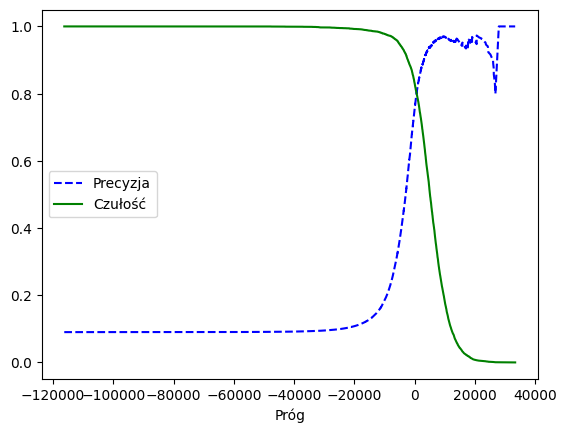

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precyzja")
    plt.plot(thresholds, recalls[:-1], "g-", label="Czułość")
    plt.xlabel("Próg")
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Innym sposobem wyznaczenia dobrego kompromisu jest narysowanie wykresu precyzji bezpośrednio w funkcji czułości.

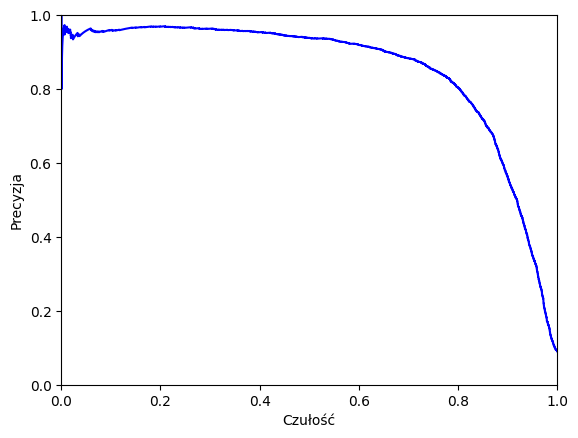

In [21]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b")
    plt.xlabel("Czułość")
    plt.ylabel("Precyzja")
    plt.xlim(0,1)
    plt.ylim(0,1)
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

Dla zwiększenia dokładności można poszukać najmniejszego progu zapewniającego precyzję rzędu co najmniej 90% (funkcja <i>np.argmax()</i> wyznaczy pierwszy indeks wartości maksymalnej, co w tym przypadku oznacza pierwszą wartość true).

In [22]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

y_train_pred_90 = (y_scores > threshold_90_precision)
print('Precyzja po ustaleniu nowego progu', precision_score(y_train_5, y_train_pred_90))
print('Czułość dla wybranej wartości precyzji', recall_score(y_train_5, y_train_pred_90))

3045.9258227053638
Precyzja po ustaleniu nowego progu 0.9001764557600201
Czułość dla wybranej wartości precyzji 0.6587345508208817


Powyższe operacje pokazują, jak uzyskać klasyfikator z 90% precyzją, jednak może on być mało przydatny jeśli ma małą pełność.

W celu dalszej analizy tego typu problemu w przypadku kalasyfikatorów binarnych można skorzystać z interpretacji krzywej ROC (<i>receiver operating characteristic</i>). W jej przypadku wykreślany jest odsetek prawdziwie pozytywnych w funkcji odsetka fałszywie pozytywnych - jest to odsetek negatywnych przykładów, które zostały nieprawidłowo sklasyfikowane jako pozytywne. Otrzymuje się tę wartość, odejmując odsetek prawdziwie negatywnych od liczby 1. Jak można się domyślać, jest to odsetek negatywnych próbek, które zostały prawidłowo sklasyfikowane jako negatywne. Wartość ta bywa również nazywana specyficznością. 
W celu wykreślenia krzywej ROC można skorzystać z funkcji <i>roc_curve()</i>.

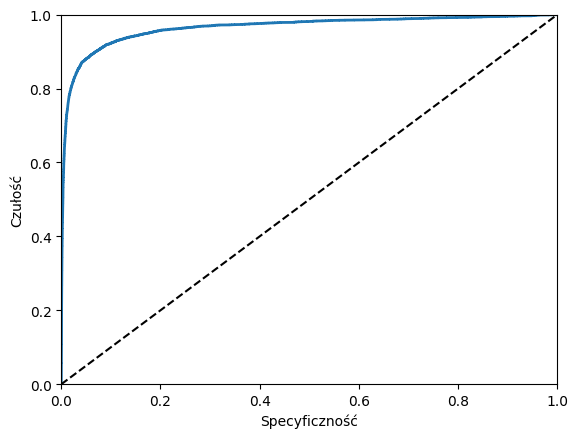

In [23]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Przerywana przekątna wykresu
    plt.ylabel("Czułość")
    plt.xlabel("Specyficzność")
    plt.xlim(0,1)
    plt.ylim(0,1)

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

W tym przypadku nalezy także pójść na kompromis: im wyższa wartość pełności tym więcej fałszywie pozytywnych przypadków wskazuje klasyfikator. Linia przerywana symbolizuje krzywą ROC całkowicie losowego klasyfikatora -  dobry klasyfikator stara się nie zbliżać do tej prostej (czyli dąży do lewej górnej części wykresu).

Jednym ze sposobów porównania klasyfikatorów jest pomiar ich obszaru pod krzywą (<i>area
under the curve</i> - AUC), co w przypadku scikit-learn realizuje funkcja <i>roc_auc_score()</i>.

In [24]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9648211175804801


Obszar AUC w przypadku doskonałego klasyfikatora byłby równy 1.0, natomiast w całkowicie losowym klasyfikatorze ma on wartość 0.5.

# Zadania do wykonania

<p><b>Zadanie 1</b></p>
Dla przykładu 1 przeprowadź eksperymenty pokazujące wpływ wyboru funkcji straty oraz współczynników uczenia (zgodnie z dokumentacją) na końcowy wynik klasyfikacji.
<p><b>Zadanie 2</b></p>
Dla przykładu 2 przeprowadź sprawdzenie walidacji krzyżowej dla kilku wartości $k$ - w jaki sposób wpływa to na wartości dokładności, precyzji, czułości i F-score? Eksperymenty przeprowadź w ten sposób, że klasę pozytywną będzie reprezentowała wyłącznie ostatnia cyfra Twojego numeru albumu.
<p><b>Zadanie 3</b></p>
Zbadaj wpływ wyboru wartości precyzji dla zadanej wartości na czułość i F-score oraz dokonaj analizy wykresów precyzji w funkcji czułości interpretując krzywą ROC. Na podstawie tych analiz uzasadnij, w jakich sytuacjach korzystać z krzywej ROC, a kiedy z wykresu precyzji w funkcji czułości?

![stopka.svg](stopka.svg)

In [26]:
def plot_decision(clf : SGDClassifier):

    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([[x1, x2]])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'
    plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

    plt.axis('tight')

In [41]:
# Zadanie 1

X, Y = make_blobs(n_samples=5000, centers=2, random_state=0, cluster_std=0.30)

loss_list = ['hinge', 'log_loss', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
learning_rate_list = np.arange(0.001, 1.1, 0.01)
loss_scores = []
learning_rate_scores = []

for loss in loss_list:
    clf = SGDClassifier(loss=loss, alpha=0.01, max_iter=400)
    clf.fit(X, Y)
    print("Loss function: ", loss)
    print("Score: ", clf.score(X,Y))
    loss_scores.append(clf.score(X,Y))
    print("====================\n")

best_loss = loss_list[np.argmax(loss_scores)]
print("Best loss: ", best_loss)

for l_rate in learning_rate_list:
    clf = SGDClassifier(loss=best_loss, alpha=l_rate, max_iter=600)
    clf.fit(X, Y)
    print("Learning Rate: ", l_rate)
    print("Score: ", clf.score(X,Y))
    learning_rate_scores.append(clf.score(X,Y))
    print("====================\n")

best_l_rate = learning_rate_list[np.argmax(learning_rate_scores)]
print(f"Best Combination: {best_loss} + {best_l_rate} ")


Loss function:  hinge
Score:  1.0

Loss function:  log_loss
Score:  1.0

Loss function:  log_loss
Score:  1.0

Loss function:  modified_huber
Score:  1.0

Loss function:  squared_hinge
Score:  0.9882

Loss function:  perceptron
Score:  0.9984

Loss function:  squared_error
Score:  0.4406

Loss function:  huber
Score:  1.0

Loss function:  epsilon_insensitive
Score:  1.0

Loss function:  squared_epsilon_insensitive
Score:  0.4966

Best loss:  hinge
Learning Rate:  0.001
Score:  1.0

Learning Rate:  0.011
Score:  1.0

Learning Rate:  0.020999999999999998
Score:  1.0

Learning Rate:  0.030999999999999996
Score:  1.0

Learning Rate:  0.040999999999999995
Score:  1.0

Learning Rate:  0.05099999999999999
Score:  1.0

Learning Rate:  0.06099999999999999
Score:  1.0

Learning Rate:  0.071
Score:  1.0

Learning Rate:  0.08099999999999999
Score:  1.0

Learning Rate:  0.09099999999999998
Score:  1.0

Learning Rate:  0.10099999999999998
Score:  1.0

Learning Rate:  0.11099999999999999
Score:  1.0


c:\Users\blaze\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\blaze\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Learning Rate:  0.13099999999999998
Score:  1.0

Learning Rate:  0.141
Score:  1.0

Learning Rate:  0.15099999999999997
Score:  1.0

Learning Rate:  0.16099999999999998
Score:  1.0

Learning Rate:  0.17099999999999999
Score:  1.0

Learning Rate:  0.18099999999999997
Score:  1.0

Learning Rate:  0.19099999999999998
Score:  1.0

Learning Rate:  0.20099999999999996
Score:  1.0

Learning Rate:  0.21099999999999997
Score:  1.0

Learning Rate:  0.22099999999999997
Score:  1.0

Learning Rate:  0.23099999999999996
Score:  1.0

Learning Rate:  0.24099999999999996
Score:  1.0

Learning Rate:  0.25099999999999995
Score:  1.0

Learning Rate:  0.26099999999999995
Score:  1.0

Learning Rate:  0.27099999999999996
Score:  1.0

Learning Rate:  0.28099999999999997
Score:  1.0

Learning Rate:  0.291
Score:  1.0

Learning Rate:  0.30099999999999993
Score:  1.0

Learning Rate:  0.31099999999999994
Score:  1.0

Learning Rate:  0.32099999999999995
Score:  1.0

Learning Rate:  0.33099999999999996
Score:  1.0


**ZADANIE 2**

In [42]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [47]:
# Zadanie 2
# Indeks = 188982
import keras
import tensorflow as tf
from sklearn.model_selection import cross_val_score
import numpy as np

INDEX = 2
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

y_train_index = (y_train == INDEX)
y_test_index = (y_test == INDEX)
print(y_train_index[0], y_train_index[1])

print(X_train.shape[0], X_train.shape[1],X_train.shape[2] )
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

never_5_clf = Never5Classifier()
sgd_clf = SGDClassifier(random_state=42)

False False
60000 28 28


In [53]:
cross_val_list = np.arange(2,8,1)
for cross_val in cross_val_list:
    pred = cross_val_predict(sgd_clf, X_train, y_train_index, cv=cross_val)
    print("CV: ", cross_val)
    print("Precision: ", precision_score(y_train_index,pred))
    print("Recall: ", recall_score(y_train_index,pred))
    print("F1: ", f1_score(y_train_index,pred))
    print("======================\n")
    

CV:  2
Precision:  0.894989019764424
Recall:  0.75243370258476
F1:  0.8175435397100392

CV:  3
Precision:  0.6685199894095843
Recall:  0.8475998657267539
F1:  0.7474837181764358

CV:  4
Precision:  0.8629073104845517
Recall:  0.8578382007385028
F1:  0.8603652891170777

CV:  5
Precision:  0.8266129032258065
Recall:  0.860187982544478
F1:  0.8430662937983221

CV:  6
Precision:  0.8505453306066802
Recall:  0.8376972138301444
F1:  0.8440723828851683

CV:  7
Precision:  0.8713408023129744
Recall:  0.8093319906008728
F1:  0.8391924817264184



In [61]:
# Zadanie 3
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_index, cv=5, method="decision_function")

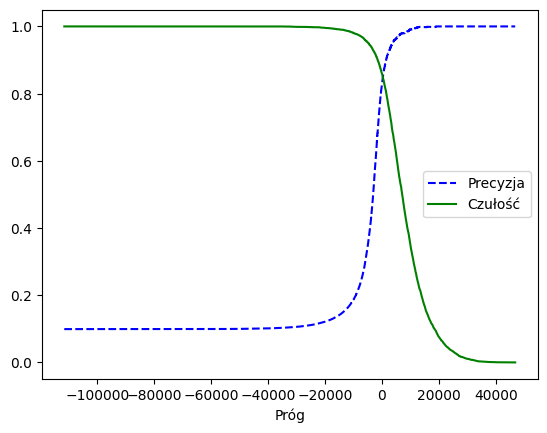

In [66]:
precisions, recalls, thresholds = precision_recall_curve(y_train_index, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precyzja")
    plt.plot(thresholds, recalls[:-1], "g-", label="Czułość")
    plt.xlabel("Próg")
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [67]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Przerywana przekątna wykresu
    plt.ylabel("Czułość")
    plt.xlabel("Specyficzność")
    plt.xlim(0,1)
    plt.ylim(0,1)

Precyzja po ustaleniu nowego progu 0.5000451548812427
Czułość dla wybranej wartości precyzji 0.9293387042631756
Precyzja po ustaleniu nowego progu 0.6000659413122321
Czułość dla wybranej wartości precyzji 0.9164149043303121
Precyzja po ustaleniu nowego progu 0.7001308900523561
Czułość dla wybranej wartości precyzji 0.8977844914400805
Precyzja po ustaleniu nowego progu 0.8001850138760407
Czułość dla wybranej wartości precyzji 0.8710976837865055
Precyzja po ustaleniu nowego progu 0.9002071173037093
Czułość dla wybranej wartości precyzji 0.802450486740517
Precyzja po ustaleniu nowego progu 1.0
Czułość dla wybranej wartości precyzji 0.09483048002685465
Precyzja po ustaleniu nowego progu 0.0993016550275838
Czułość dla wybranej wartości precyzji 1.0


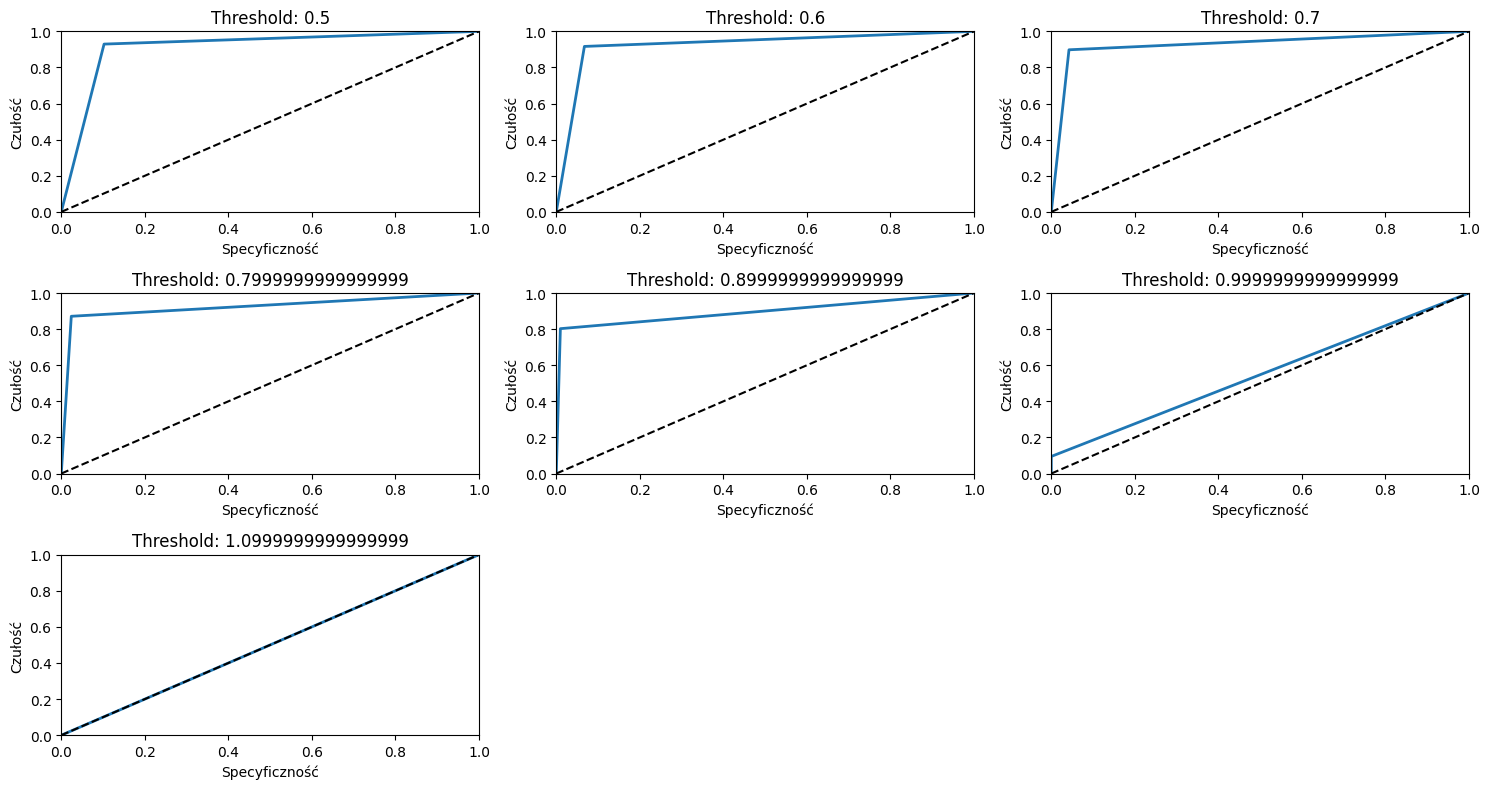

In [69]:
threshold_precisions = []
precision_list = np.arange(0.5,1.1,0.1)

plt.figure(figsize=(15,8))
for i,prec in enumerate(precision_list):
    threshold_prec = thresholds[np.argmax(precisions >= prec)]
    threshold_precisions.append(threshold_prec)
    y_train_pred_thresh = (y_scores > threshold_prec)
    print('Precyzja po ustaleniu nowego progu', precision_score(y_train_index, y_train_pred_thresh))
    print('Czułość dla wybranej wartości precyzji', recall_score(y_train_index, y_train_pred_thresh))
    fpr, tpr, thresholds_roc = roc_curve(y_train_index, y_train_pred_thresh)
    plt.subplot(3,3,i+1)
    plt.title(f"Threshold: {prec}")
    plot_roc_curve(fpr, tpr)
    plt.tight_layout()

plt.show()